In [1]:
import pandas as pd

In [2]:
pref = pd.read_csv("COVID-19-jp/nhk_news_covid19_prefectures_daily_data.csv")
pref["日付"] = pd.to_datetime(pref["日付"] )
print(len(pref))
pref.tail()

23359


,日付,都道府県コード,都道府県名,各地の感染者数_1日ごとの発表数,各地の感染者数_累計,各地の死者数_1日ごとの発表数,各地の死者数_累計
23354,2021-05-22,47,沖縄県,231,14925,0,148
23355,2021-05-23,47,沖縄県,156,15081,0,148
23356,2021-05-24,47,沖縄県,104,15185,0,148
23357,2021-05-25,47,沖縄県,256,15441,0,148
23358,2021-05-26,47,沖縄県,302,15743,0,148


In [3]:
all_jp = pref.groupby(["都道府県名"], as_index=False).sum()
del all_jp["各地の感染者数_累計"]
del all_jp["各地の死者数_累計"]
#all_jp = all_jp.rename(columns={"各地の感染者数合計":"各地の感染者数_1日ごとの発表数"})
all_jp = all_jp.rename(columns={"各地の感染者数_1日ごとの発表数":"各地の感染者数合計"})
all_jp = all_jp.rename(columns={"各地の死者数_1日ごとの発表数":"各地の死者数合計"})
all_jp.tail()

,都道府県名,都道府県コード,各地の感染者数合計,各地の死者数合計
42,静岡県,10934,8127,135
43,香川県,18389,1969,24
44,高知県,19383,1337,20
45,鳥取県,15407,462,2
46,鹿児島県,22862,3203,30


## 都道府県ごとの最新データを付与

In [4]:
# 直近１週間の感染者数
pref["直近1週間の感染者数"] = pref["各地の感染者数_1日ごとの発表数"].rolling(7).sum()
pref.tail(7)

,日付,都道府県コード,都道府県名,各地の感染者数_1日ごとの発表数,各地の感染者数_累計,各地の死者数_1日ごとの発表数,各地の死者数_累計,直近1週間の感染者数
23352,2021-05-20,47,沖縄県,198,14487,1,147,1000.0
23353,2021-05-21,47,沖縄県,207,14694,1,148,1073.0
23354,2021-05-22,47,沖縄県,231,14925,0,148,1144.0
23355,2021-05-23,47,沖縄県,156,15081,0,148,1222.0
23356,2021-05-24,47,沖縄県,104,15185,0,148,1267.0
23357,2021-05-25,47,沖縄県,256,15441,0,148,1355.0
23358,2021-05-26,47,沖縄県,302,15743,0,148,1454.0


### 感染者数前日比

In [5]:
import numpy as np
pref["新規感染者数前日比"] = pref["各地の感染者数_1日ごとの発表数"].pct_change()
# 一番古い日付だけNANを設定
pref.loc[pref["日付"]==pref["日付"].min(),"新規感染者数前日比"] = np.nan
pref["直近1週間の新規感染者数前日比平均"] = pref["新規感染者数前日比"].rolling(7).mean()
pref.tail()

,日付,都道府県コード,都道府県名,各地の感染者数_1日ごとの発表数,各地の感染者数_累計,各地の死者数_1日ごとの発表数,各地の死者数_累計,直近1週間の感染者数,新規感染者数前日比,直近1週間の新規感染者数前日比平均
23354,2021-05-22,47,沖縄県,231,14925,0,148,1144.0,0.115942,0.205210
23355,2021-05-23,47,沖縄県,156,15081,0,148,1222.0,-0.324675,0.232042
23356,2021-05-24,47,沖縄県,104,15185,0,148,1267.0,-0.333333,0.219221
23357,2021-05-25,47,沖縄県,256,15441,0,148,1355.0,1.461538,0.164090
23358,2021-05-26,47,沖縄県,302,15743,0,148,1454.0,0.179688,0.159998


In [6]:
latest = pref.loc[pref["日付"]==pref["日付"].max()][["都道府県名","直近1週間の感染者数","新規感染者数前日比","直近1週間の新規感染者数前日比平均"]]
latest.head()

,都道府県名,直近1週間の感染者数,新規感染者数前日比,直近1週間の新規感染者数前日比平均
496,北海道,4047.0,0.200436,0.011295
993,青森県,230.0,0.500000,0.348814
1490,岩手県,105.0,0.153846,0.052264
1987,宮城県,136.0,0.222222,0.050964
2484,秋田県,35.0,-0.625000,0.805272


In [7]:
all_jp = pd.merge(all_jp, latest, on="都道府県名")
all_jp.head()

,都道府県名,都道府県コード,各地の感染者数合計,各地の死者数合計,直近1週間の感染者数,新規感染者数前日比,直近1週間の新規感染者数前日比平均
0,三重県,11928,4775,103,195.0,0.142857,0.141140
1,京都府,12922,15592,204,573.0,0.306452,-0.016696
2,佐賀県,20377,2450,18,129.0,-0.250000,-0.061024
3,兵庫県,13916,39224,1136,1071.0,0.007194,-0.009954
4,北海道,497,35957,1038,4047.0,0.200436,0.011295


## 人口データを付与

In [8]:
pop = pd.read_excel("COVID-19-jp/2001stjin.xls",header=3)[["Unnamed: 1","計"]]
pop.rename(columns={"Unnamed: 1":"都道府県名"},inplace=True)
pop.rename(columns={"計":"人口"},inplace=True)
pop = pop.loc[pop["都道府県名"]!="合計"].reset_index(drop=True)

In [9]:
all_jp = pd.merge(all_jp, pop, on="都道府県名", how="left")
all_jp.head()

,都道府県名,都道府県コード,各地の感染者数合計,各地の死者数合計,直近1週間の感染者数,新規感染者数前日比,直近1週間の新規感染者数前日比平均,人口
0,三重県,11928,4775,103,195.0,0.142857,0.141140,1813859
1,京都府,12922,15592,204,573.0,0.306452,-0.016696,2545899
2,佐賀県,20377,2450,18,129.0,-0.250000,-0.061024,823810
3,兵庫県,13916,39224,1136,1071.0,0.007194,-0.009954,5549568
4,北海道,497,35957,1038,4047.0,0.200436,0.011295,5267762


## 人口当たりの感染者数

In [10]:
all_jp["１万人当たりの感染者数"] = all_jp["各地の感染者数合計"] / (all_jp["人口"] / 10000)
all_jp["10万人当たりの感染者数"] = all_jp["各地の感染者数合計"] / (all_jp["人口"] / 100000)
all_jp["直近1週間の10万人当たりの感染者数"] = all_jp["直近1週間の感染者数"] / (all_jp["人口"] / 100000)
all_jp.sort_values("都道府県コード")

,都道府県名,都道府県コード,各地の感染者数合計,各地の死者数合計,直近1週間の感染者数,新規感染者数前日比,直近1週間の新規感染者数前日比平均,人口,１万人当たりの感染者数,10万人当たりの感染者数,直近1週間の10万人当たりの感染者数
4,北海道,497,35957,1038,4047.0,0.200436,0.011295,5267762,68.258589,682.585888,76.825794
41,青森県,994,2263,29,230.0,0.500000,0.348814,1275783,17.738126,177.381263,18.028144
19,岩手県,1491,1380,43,105.0,0.153846,0.052264,1235517,11.169413,111.694133,8.498467
11,宮城県,1988,8777,82,136.0,0.222222,0.050964,2292385,38.287635,382.876349,5.932686
36,秋田県,2485,753,12,35.0,-0.625000,0.805272,985416,7.641443,76.414428,3.551799
15,山形県,2982,1921,39,146.0,0.500000,-0.001735,1082296,17.749303,177.493033,13.489840
35,福島県,3479,4509,138,178.0,1.153846,0.019583,1881981,23.958797,239.587966,9.458119
38,茨城県,3976,9543,144,359.0,0.320000,0.092213,2921436,32.665443,326.654426,12.288477
27,栃木県,4473,6183,75,236.0,0.678571,0.104986,1965516,31.457388,314.573883,12.007025
37,群馬県,4970,7702,133,332.0,0.777778,0.135145,1969439,39.107583,391.075834,16.857592


## 感染者数

### 平均値、中央値

In [11]:
all_jp["各地の感染者数合計"].describe()

count        47.000000
mean      15479.723404
std       28661.662911
min         462.000000
25%        2356.500000
50%        4699.000000
75%        9855.000000
max      158410.000000
Name: 各地の感染者数合計, dtype: float64

### TOP 10

In [12]:
all_jp.sort_values("各地の感染者数合計", ascending=False).reset_index(drop=True).head(10)

,都道府県名,都道府県コード,各地の感染者数合計,各地の死者数合計,直近1週間の感染者数,新規感染者数前日比,直近1週間の新規感染者数前日比平均,人口,１万人当たりの感染者数,10万人当たりの感染者数,直近1週間の10万人当たりの感染者数
0,東京都,6461,158410,2031,4254.0,0.370849,0.041022,13834925,114.500079,1145.000786,30.748269
1,大阪府,13419,98610,2217,2470.0,0.012232,-0.021959,8849635,111.428324,1114.283244,27.910756
2,神奈川県,6958,60398,877,1812.0,0.125000,-0.017034,9209442,65.582692,655.826922,19.675459
3,愛知県,11431,45719,743,3413.0,0.067146,-0.017994,7575530,60.350893,603.508929,45.052953
4,埼玉県,5467,43195,778,1130.0,0.281250,0.030835,7390054,58.450182,584.501818,15.290822
5,兵庫県,13916,39224,1136,1071.0,0.007194,-0.009954,5549568,70.679375,706.793754,19.298799
6,千葉県,5964,36614,673,794.0,0.255102,0.026318,6319772,57.935634,579.356344,12.563744
7,北海道,497,35957,1038,4047.0,0.200436,0.011295,5267762,68.258589,682.585888,76.825794
8,福岡県,19880,33327,429,1962.0,0.060302,-0.108518,5129841,64.966926,649.669259,38.246799
9,沖縄県,23359,15743,148,1454.0,0.179688,0.159998,1481547,106.260551,1062.605506,98.140660


## １万人あたりの感染者数

### 平均値、中央値

In [13]:
all_jp["１万人当たりの感染者数"].describe()

count     47.000000
mean      36.905614
std       26.126195
min        7.641443
25%       19.640719
50%       28.395741
75%       48.821474
max      114.500079
Name: １万人当たりの感染者数, dtype: float64

## 直近１週間の１０万人あたりの感染者数

In [14]:
all_jp.sort_values(["直近1週間の10万人当たりの感染者数"],ascending=False).head(10)

,都道府県名,都道府県コード,各地の感染者数合計,各地の死者数合計,直近1週間の感染者数,新規感染者数前日比,直近1週間の新規感染者数前日比平均,人口,１万人当たりの感染者数,10万人当たりの感染者数,直近1週間の10万人当たりの感染者数
28,沖縄県,23359,15743,148,1454.0,0.179688,0.159998,1481547,106.260551,1062.605506,98.140660
4,北海道,497,35957,1038,4047.0,0.200436,0.011295,5267762,68.258589,682.585888,76.825794
24,愛知県,11431,45719,743,3413.0,0.067146,-0.017994,7575530,60.350893,603.508929,45.052953
21,広島県,16898,10167,125,1160.0,0.257576,-0.015663,2826858,35.965726,359.657259,41.034958
34,福岡県,19880,33327,429,1962.0,0.060302,-0.108518,5129841,64.966926,649.669259,38.246799
18,岡山県,16401,7111,97,603.0,0.413793,-0.017261,1903627,37.355007,373.550070,31.676374
26,東京都,6461,158410,2031,4254.0,0.370849,0.041022,13834925,114.500079,1145.000786,30.748269
9,大阪府,13419,98610,2217,2470.0,0.012232,-0.021959,8849635,111.428324,1114.283244,27.910756
17,岐阜県,10437,8325,154,544.0,-0.130952,-0.034747,2032490,40.959611,409.596111,26.765199
31,石川県,8449,3632,101,304.0,-0.643564,0.415973,1139612,31.870496,318.704963,26.675746


## 直近１週間の新規感染者 増加速度

## 増加速度 統計情報

In [15]:
all_jp["直近1週間の新規感染者数前日比平均"].describe()

count    45.000000
mean      0.074986
std       0.161000
min      -0.108518
25%      -0.017261
50%       0.030835
75%       0.135145
max       0.805272
Name: 直近1週間の新規感染者数前日比平均, dtype: float64

### WORST 10(増加速度の早い順)

In [16]:
all_jp.sort_values("直近1週間の新規感染者数前日比平均",ascending=False).head(10)

,都道府県名,都道府県コード,各地の感染者数合計,各地の死者数合計,直近1週間の感染者数,新規感染者数前日比,直近1週間の新規感染者数前日比平均,人口,１万人当たりの感染者数,10万人当たりの感染者数,直近1週間の10万人当たりの感染者数
36,秋田県,2485,753,12,35.0,-0.625000,0.805272,985416,7.641443,76.414428,3.551799
31,石川県,8449,3632,101,304.0,-0.643564,0.415973,1139612,31.870496,318.704963,26.675746
41,青森県,994,2263,29,230.0,0.500000,0.348814,1275783,17.738126,177.381263,18.028144
20,島根県,15904,520,0,51.0,0.000000,0.292909,679324,7.654668,76.546685,7.507463
16,山梨県,9443,1506,19,73.0,0.600000,0.228218,826579,18.219674,182.196741,8.831582
12,宮崎県,22365,2996,25,115.0,-0.411765,0.225931,1095903,27.338186,273.381860,10.493629
6,和歌山県,14910,2586,41,69.0,0.714286,0.196939,954258,27.099589,270.995894,7.230749
44,高知県,19383,1337,20,149.0,-0.068966,0.190451,709230,18.851430,188.514304,21.008700
28,沖縄県,23359,15743,148,1454.0,0.179688,0.159998,1481547,106.260551,1062.605506,98.140660
33,福井県,8946,1034,34,30.0,1.333333,0.158730,780053,13.255510,132.555096,3.845893


### BEST 10(増加速度の遅い順／減少速度の速い順)

In [17]:
all_jp.sort_values("直近1週間の新規感染者数前日比平均",ascending=True).head(10)

,都道府県名,都道府県コード,各地の感染者数合計,各地の死者数合計,直近1週間の感染者数,新規感染者数前日比,直近1週間の新規感染者数前日比平均,人口,１万人当たりの感染者数,10万人当たりの感染者数,直近1週間の10万人当たりの感染者数
34,福岡県,19880,33327,429,1962.0,0.060302,-0.108518,5129841,64.966926,649.669259,38.246799
39,長崎県,20874,2842,63,53.0,-0.142857,-0.093367,1350769,21.039867,210.398669,3.923691
43,香川県,18389,1969,24,112.0,-0.307692,-0.085025,981280,20.065629,200.656286,11.413664
22,徳島県,17892,1625,61,30.0,0.000000,-0.076531,742505,21.885375,218.853745,4.040377
2,佐賀県,20377,2450,18,129.0,-0.250000,-0.061024,823810,29.739867,297.398672,15.658950
30,熊本県,21371,6084,94,399.0,0.000000,-0.050513,1769880,34.375212,343.752119,22.543901
17,岐阜県,10437,8325,154,544.0,-0.130952,-0.034747,2032490,40.959611,409.596111,26.765199
46,鹿児島県,22862,3203,30,217.0,-0.037037,-0.029275,1630146,19.648547,196.485468,13.311691
8,大分県,21868,3269,40,258.0,0.055556,-0.026853,1151229,28.395741,283.957406,22.410832
9,大阪府,13419,98610,2217,2470.0,0.012232,-0.021959,8849635,111.428324,1114.283244,27.910756


## グラフ化

In [18]:
import matplotlib.pyplot as plt
%matplotlib notebook
#%matplotlib inline

In [19]:
all_jp_desc = all_jp.sort_values(["各地の感染者数合計"],ascending=False)
all_jp_desc_10k = all_jp.sort_values(["１万人当たりの感染者数"],ascending=False)
all_jp_desc_100k = all_jp.sort_values(["直近1週間の10万人当たりの感染者数"],ascending=False)

<IPython.core.display.Javascript object>


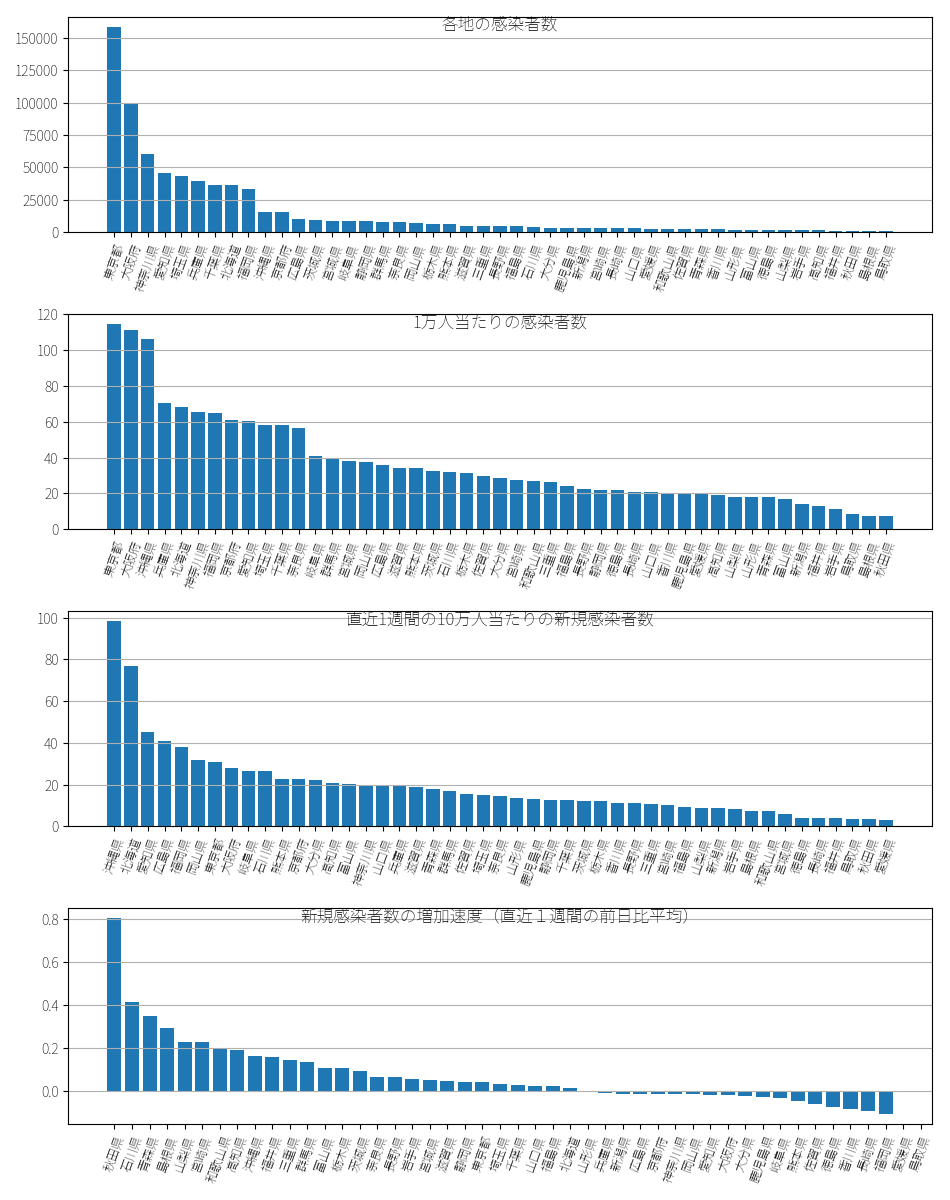

In [20]:
fig = plt.figure(figsize=(9.5,12))
plt.subplot(4,1,1) # (rows, columns, panel number)
plt.xticks(rotation="70",fontsize=9)
plt.grid(axis="y")
plt.bar(all_jp_desc["都道府県名"], all_jp_desc["各地の感染者数合計"])
plt.title("各地の感染者数", y=0.9)

plt.subplot(4,1,2) # (rows, columns, panel number)
plt.xticks(rotation="70",fontsize=9)
plt.grid(axis="y")
plt.bar(all_jp_desc_10k["都道府県名"], all_jp_desc_10k["１万人当たりの感染者数"])
plt.title("1万人当たりの感染者数",y=0.9)


plt.subplot(4,1,3) # (rows, columns, panel number)
plt.xticks(rotation="70",fontsize=9)
plt.grid(axis="y")
plt.bar(all_jp_desc_100k["都道府県名"], all_jp_desc_100k["直近1週間の10万人当たりの感染者数"])
plt.title("直近1週間の10万人当たりの新規感染者数",y=0.9)

### 新規感染者数の増加速度（直近１週間の前日比平均）
plt.subplot(4,1,4) # (rows, columns, panel number)
all_jp_v = all_jp.sort_values("直近1週間の新規感染者数前日比平均",ascending=False)
plt.xticks(rotation="70",fontsize=9)
plt.grid(axis="y")
plt.bar(all_jp_v["都道府県名"], all_jp_v["直近1週間の新規感染者数前日比平均"])
plt.title("新規感染者数の増加速度（直近１週間の前日比平均）",y=0.9)

fig.tight_layout()


## 度数分布表

In [21]:
import numpy as np
data = np.array(all_jp["各地の感染者数合計"])
 
# ヒストグラム
hist, bin_edges = np.histogram(data, bins=8)

print(hist)
print(bin_edges)

[38  4  2  1  1  0  0  1]
[   462.   20205.5  39949.   59692.5  79436.   99179.5 118923.  138666.5
 158410. ]


## ヒストグラム

<IPython.core.display.Javascript object>


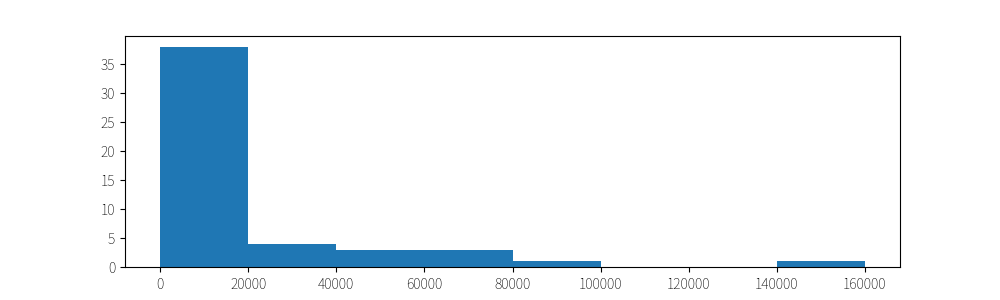

(array([38.,  4.,  3.,  1.,  0.,  0.,  1.]),
 array([     0,  20000,  40000,  80000, 100000, 120000, 140000, 160000]),
 <a list of 7 Patch objects>)

In [22]:
fig = plt.figure(figsize=(10,3))
plt.hist(all_jp_desc["各地の感染者数合計"],bins=[0,20000,40000,80000,100000,120000,140000,160000])

<IPython.core.display.Javascript object>


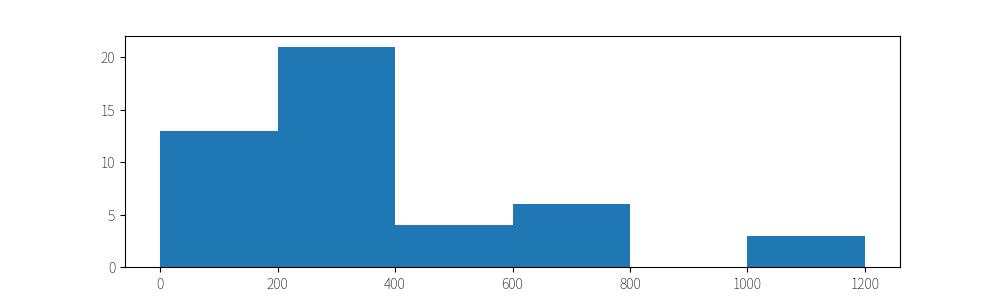

(array([13., 21.,  4.,  6.,  0.,  3.]),
 array([   0,  200,  400,  600,  800, 1000, 1200]),
 <a list of 6 Patch objects>)

In [23]:
fig = plt.figure(figsize=(10,3))
plt.hist(all_jp_desc["10万人当たりの感染者数"],bins=[0,200,400,600,800,1000,1200])
